# Imports

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Dataset has about 23 columns
pd.set_option('display.max_column', 23)

# Data Accessing

In [3]:
df: pd.DataFrame = pd.read_csv('data/raw/Kaggle_Training_Dataset_v2.csv')
print(df.shape)
df.head()

(1687861, 23)


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

#### Observation

1. Dataset has 16.87 lakhs columns and 23 rows.
2. Memory consumption 300 MB
3. Most of the columns are `float` valued and 8 out of 23 are `object` type.
4. There are some common column: `forecast, sales, pref`.
5. Target column: `went_on_backorder`

# Data Cleaning

## Null valued rows

`'sku'` column has a fringe value which made this column as `object` dtype.

In [5]:
df = df[:-1]
df['sku'] = df['sku'].astype(int)

In [6]:
df.isnull().sum()

sku                       0
national_inv              0
lead_time            100893
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

#### Observation

1. Only one column has `null` values.
2. `lead_time` has 1 lakh `null` values which is about **6.25%** of data.

## Check data types

In [7]:
obj_cols = [i for i in df.columns if df[i].dtype=='O']
num_cols = [i for i in df.columns if df[i].dtype!='O']

In [8]:
obj_cols, 

(['potential_issue',
  'deck_risk',
  'oe_constraint',
  'ppap_risk',
  'stop_auto_buy',
  'rev_stop',
  'went_on_backorder'],)

In [9]:
num_cols

['sku',
 'national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_3_month',
 'forecast_6_month',
 'forecast_9_month',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month',
 'min_bank',
 'pieces_past_due',
 'perf_6_month_avg',
 'perf_12_month_avg',
 'local_bo_qty']

After observing the dataset most of the columns have `integer` data but it had been recognize as `float` data point.

Only three columns has `float` valued data points: `'perf_6_month_avg', 'perf_12_month_avg', 'lead_time'`.

In [10]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [11]:
for col in num_cols:
    if col in ['perf_6_month_avg', 'perf_12_month_avg', 'lead_time']:
        continue
    df[col] = df[col].astype(int)

In [12]:
for i in obj_cols:
    print(i, '>>>', df[i].unique())

potential_issue >>> ['No' 'Yes']
deck_risk >>> ['No' 'Yes']
oe_constraint >>> ['No' 'Yes']
ppap_risk >>> ['No' 'Yes']
stop_auto_buy >>> ['Yes' 'No']
rev_stop >>> ['No' 'Yes']
went_on_backorder >>> ['No' 'Yes']


Here all object type columns have `['No' 'Yes']` distinct value.

In [13]:
df.loc[:, obj_cols] = df[obj_cols].applymap(lambda x: 1 if x=='Yes' else 0)

As the dataset description suggest the `sku` column is not useful for prediction.

In [14]:
df.drop(columns=['sku'], inplace=True)

In [15]:
df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,-99.00,-99.00,0,0,0,0,1,0,0
1,2,9.0,0,0,0,0,0,0,0,0,0,0,0,0.99,0.99,0,0,0,0,1,0,0
2,2,NaN,0,0,0,0,0,0,0,0,0,0,0,-99.00,-99.00,0,1,0,0,1,0,0
3,7,8.0,0,0,0,0,0,0,0,0,1,0,0,0.10,0.13,0,0,0,0,1,0,0
4,8,NaN,0,0,0,0,0,0,0,4,2,0,0,-99.00,-99.00,0,1,0,0,1,0,0


In [16]:
df['lead_time'].isnull().sum()

100893

`lead_time` column has about **1 lakh null values**. We need to fill these null values using `SimpleImputer`.

In [17]:
df['lead_time']

0          NaN
1          9.0
2          NaN
3          8.0
4          NaN
          ... 
1687855    2.0
1687856    NaN
1687857    9.0
1687858    9.0
1687859    4.0
Name: lead_time, Length: 1687860, dtype: float64

In [18]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer.fit(df[['lead_time']])

df['lead_time'] = imputer.transform(df[['lead_time']])

In [19]:
df['lead_time'].isnull().sum()

0

<AxesSubplot: xlabel='lead_time', ylabel='Count'>

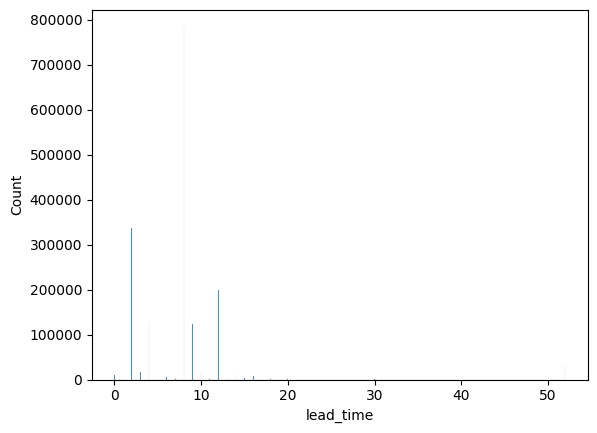

In [20]:
sns.histplot(df, x='lead_time')

In [21]:
df['lead_time'] = df['lead_time'].astype(int, True)

# Feature Engineering

In [22]:
# Nothing

# Feature Selection

In [23]:
corr_matrix = df.corr()

# plt.figure(figsize=(22, 22))
# sns.heatmap(corr_matrix, annot=True, fmt='.4f', cmap='coolwarm')

# Save the heatmap graph
# plt.savefig('graphs/heatmap.png', bbox_inches='tight')

In [24]:
corr_matrix['went_on_backorder'].sort_values(ascending=False)

went_on_backorder    1.000000
potential_issue      0.014090
perf_6_month_avg     0.011676
perf_12_month_avg    0.011593
local_bo_qty         0.009504
ppap_risk            0.008814
oe_constraint        0.003837
pieces_past_due      0.000516
forecast_3_month    -0.000340
forecast_6_month    -0.000840
forecast_9_month    -0.001030
sales_1_month       -0.001131
national_inv        -0.001315
sales_3_month       -0.001512
rev_stop            -0.001708
sales_6_month       -0.001728
sales_9_month       -0.001764
min_bank            -0.001867
stop_auto_buy       -0.002424
in_transit_qty      -0.002427
deck_risk           -0.011691
lead_time           -0.018104
Name: went_on_backorder, dtype: float64

In [25]:
# Top-13 most co-related features
top_corr_cols = (corr_matrix['went_on_backorder']
                    .apply(lambda x: abs(x))
                    .sort_values(ascending=False)[:13]
                    .index
                    )

Extract the **most co-related** columns/features with the target column.

In [26]:
main_df = df[top_corr_cols]
main_df.head()

,went_on_backorder,lead_time,potential_issue,deck_risk,perf_6_month_avg,perf_12_month_avg,local_bo_qty,ppap_risk,oe_constraint,in_transit_qty,stop_auto_buy,min_bank,sales_9_month
0,0,8,0,0,-99.00,-99.00,0,0,0,0,1,0,0
1,0,9,0,0,0.99,0.99,0,0,0,0,1,0,0
2,0,8,0,1,-99.00,-99.00,0,0,0,0,1,0,0
3,0,8,0,0,0.10,0.13,0,0,0,0,1,1,0
4,0,8,0,1,-99.00,-99.00,0,0,0,0,1,2,4


# Export Cleaned Data

In [29]:
cleaned_data_path = 'data/processed/cleaned_back_order_data.parquet'
df.to_parquet(cleaned_data_path, index=False)

In [30]:
parquet_df = pd.read_parquet(cleaned_data_path)

In [31]:
print(parquet_df.shape)
parquet_df.head()

(5000, 22)


,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,8,0,0,0,0,0,0,0,0,0,0,0,-99.00,-99.00,0,0,0,0,1,0,0
1,2,9,0,0,0,0,0,0,0,0,0,0,0,0.99,0.99,0,0,0,0,1,0,0
2,2,8,0,0,0,0,0,0,0,0,0,0,0,-99.00,-99.00,0,1,0,0,1,0,0
3,7,8,0,0,0,0,0,0,0,0,1,0,0,0.10,0.13,0,0,0,0,1,0,0
4,8,8,0,0,0,0,0,0,0,4,2,0,0,-99.00,-99.00,0,1,0,0,1,0,0


# EDA

Get the similar columns at one place.

In [31]:
forecast_cols = df.columns[df.columns.str.startswith('forecast')]
sales_cols = df.columns[df.columns.str.startswith('sales')]
perf_cols = df.columns[df.columns.str.startswith('perf')]

In [32]:
# sns.pairplot(df, vars=forecast_cols, hue='went_on_backorder', height=3)
# sns.pairplot(df, vars=sales_cols, hue='went_on_backorder', height=3)
# sns.pairplot(df, vars=perf_cols, hue='went_on_backorder', height=3)

> This takes too much computing power.

# Model

**For Model Building,** we need to use the `main_df` dataset for better prediction because it contains the most co-related features to target `'went_on_backorder'`.

In [33]:
# # Scale the data
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(main_df)

# X = pd.DataFrame(
#     scaler.transform(main_df),
#     columns=main_df.columns
# )

In [34]:
# X.head()

In [35]:
# # Split the dataset
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, df['went_on_backorder'],
#     test_size=0.3,
#     random_state=42
# )

In [36]:
# X_train.shape, X_test.shape